In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

In [3]:
data = pd.read_csv('data.csv', index_col='Date')
data.index = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data.index]

In [4]:
data.head()

,沪深300,中国平安
2015-06-23,0.03214,0.0496
2015-06-24,0.01965,0.0052
2015-06-25,-0.03557,-0.0287
2015-06-26,-0.07868,-0.0605
2015-06-29,-0.03336,-0.0119


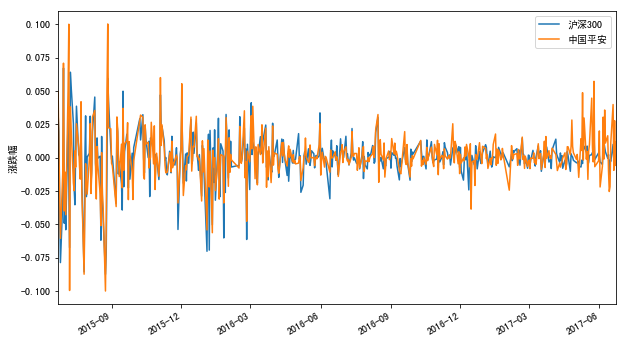

In [5]:
data.plot(figsize=(10, 6))
plt.ylabel('涨跌幅')

In [6]:
import statsmodels.api as sm

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
x = data['沪深300'].values
X = sm.add_constant(x)  #添加常数项
y = data['中国平安'].values

In [8]:
model = sm.OLS(y, X)
results = model.fit()
results.params

array([ 0.00095063,  0.80946537])

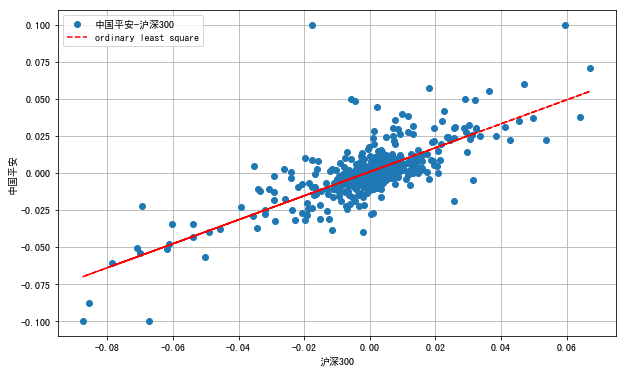

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='中国平安-沪深300')
plt.plot(x, results.fittedvalues, 'r--', label='ordinary least square')
plt.legend()
plt.xlabel('沪深300')
plt.ylabel('中国平安')
plt.grid(True)

In [10]:
import numpy.random as npr

In [11]:
factor = npr.rand(1000, 3)
Factor = sm.add_constant(factor)  #添加常数项
fac1 = factor[:, 0]  #因子1
fac2 = factor[:, 1]  #因子2
fac3 = factor[:, 2]  #因子3
e = npr.random(1000)  #噪声
port = fac1 * 0.3 + fac2 * 0.7 + fac3 * 0.4 + e  #虚构投资组合及因子权重
model1 = sm.OLS(port, Factor)
results1 = model1.fit()
results1.params

array([ 0.47751337,  0.31289247,  0.70917818,  0.38552463])